<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Neural Networks: Keras and Tensorflow
</p>
</div>

Data Science Cohort Live NYC October 2023
<p>Phase 4</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [1]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits, load_sample_images

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix
import seaborn as sns


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


#### Neural Networks: Packages

When manually implementing:

- have to keep track of forward and backwards propagation for each layer:
    - equations and updates depends on specific layer activations
- manage caching updates to gradients and weights/activations appropriately

**Deep Learning frameworks take care of this for us**

In addition:

- efficient matrix math for speedup.
- use variants of gradient descent that are **much** faster/better.

Major frameworks:

<img src = "Images/kerastf.png" >
<center> Keras: high level API of Tensorflow. </center>

- Keras: apt for quickly building/trying neural network architectures with standard layers/optimizers. Still build complex networks.
- Tensorflow: for building more customized networks and more control of optimization.

<center><img src = "Images/pytorch.png" >
More customizable than Keras. More pythonic than base Tensorflow. Nice functionalities for NLP. </center>


We will use Keras.

In [2]:
from tensorflow import keras

2023-10-17 14:54:55.921281: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Keras has two major neural network construction frameworks:
- Sequential vs Functional API

Sequential API:

<img src = "Images/sequentialvsfunctional.png" >

<center>Apt for simpler feedforward network topologies.</center>

Functional API:

<center><img src = "Images/skipconnection.png" ></center>

Skip connections, branching, etc.


#### The Sequential API

Take in a simple and sufficiently interesting dataset:

- demonstrate non-trivial decision boundary
- show sequential API at work

/Users/jacobserfaty/opt/anaconda3/envs/new-learn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jacobserfaty/opt/anaconda3/envs/new-learn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jacobserfaty/opt/anaconda3/envs/new-learn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jacobserfaty/opt/anaconda3/envs/new-learn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

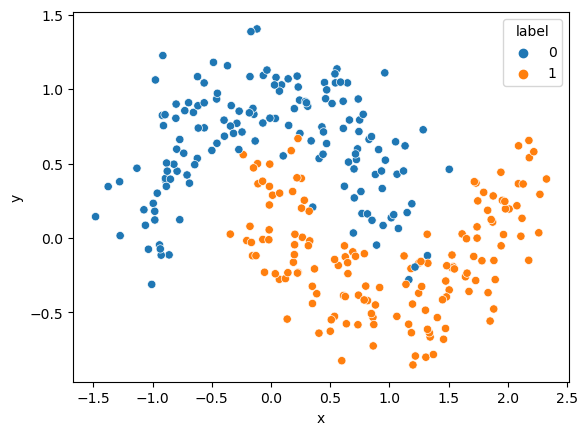

In [3]:
# generate two moons dataset
import seaborn as sns
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=10)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

sns.scatterplot(x = 'x', y = 'y', hue = 'label', data = df )
plt.show()

Import Sequential object: use Sequential API to construct models

In [37]:
from tensorflow.keras.models import Sequential

We want to start defining layers in the model:
    
The most common layer type in neural networks: 
- the **densely** connected layer

<img src = "Images/dense_layer.png" >

In [5]:
# creates densely connected layer object
from tensorflow.keras.layers import Dense

# defines input layer, not necessary in sequential API
# but nice for visualizing network later
from tensorflow.keras.layers import Input 

The Dense object constructor's basic arguments:
- units: number of nodes in layer
- activation: 'relu', 'tanh', 'sigmoid', 'softmax'


Defining the model: a shallow neural network

In [6]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu')) # one hidden layer
model.add(Dense(units=1, activation='sigmoid'))

Building/compiling the model:

- define objective function and optimizer
- define metric to evaluate train/validation
- build the network connections, weight matrices, initializes, etc.

In [7]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])

Some other loss functions:
- multiclass: 'categorical_crossentropy'
- regression: 'mean_squared_error'
- regression: 'mean_absolute_error'

The optimizer:

- Adam Optimizer: 
    - smoothens learning process 
    - uses adaptive learning rate.

A pretty good optimizer. Many other optimizers (NAdam, Adadelta).

#### Optimizers have hyperparameters.

- Can help in training speed up / finding minimum

model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy', 'AUC'])

In [8]:
from tensorflow.keras.optimizers import Adam

In [9]:
opt = Adam(learning_rate = 0.01) # typical parameter

In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])

Metrics: takes in list (calculates metrics in list at each epoch):

Regression:
- 'mae'
- 'mse'
- 'rmse'

Classification:
- 'accuracy'
- 'AUC'
- 'fmeasure'
etc.

Keras provides metrics callable as objects:
- more metrics available
- pass in arguments (probability threshold, etc.)
- build your own metrics.

See documentation for more information.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                150       
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


Train test split the data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

#### .fit() method

- batch_size = # of points you train on in given forward/back-prop loop

typical batch sizes: 1, 32, 64, 128, 256, 512

Batch size:

- Stochastic Gradient Descent: batch_size = 1
- Minibatch Gradient Descent: batch_size = $n_{batch} < N_{train}$
- Batch Gradient Descent: full training set fed in on each forward/back-prop loop

The intuition behind SGD, mini-batch:

SGD: single point $i$
$$ \textbf{w}_{k+1} = \textbf{w}_k - \alpha \nabla_{\textbf{w}}L(y_i, \hat{y}_i) $$

- Using a single point may not be good enough to sample loss function and its gradient. Noisy descent. 
- Can go wrong direction.
- Effectively looping one point at a time. Computationally inefficient.

Mini-batch gives you average of gradient over a sample of the training set: often good enough!

$$ \textbf{w}_{k+1} = \textbf{w}_k - \frac{\alpha}{n_{batch}} \sum_{i=1}^{n_{batch}} \nabla_{\textbf{w}}L(y_i, \hat{y}_i) $$

- Substantially smaller amount of data fed through: still make progress.

Batch gradient descent: all training data.
    
- Will always lower objective on training.
- But depending on dataset:
- manipulating huge matrices just to make one gradient descent step.

<img src = "Images/gradient_descent.png" >

#### Epochs
- Number of times to cycle through **entire** training data.
- Implies number of forward/backprop cycles is: $$ \frac{N_{train}}{n_{batch}} \times \text{epochs} $$

Can train through all epochs defined or:

**Earlystopping callback on training**

- Monitor training loss and set improvement threshold (min_delta)
- Waiting certain number of epochs if no improvements (patience)
- Terminate training

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
trainCallback = EarlyStopping(monitor='loss', min_delta = 1e-6, patience = 5)

**Validation set**

- can feed an external validation set 
- hold out a fraction of training set for validation
- evaluates on train and validation at each epoch

In [14]:
history = model.fit(X_train, y_train, epochs = 10000, batch_size = 32, validation_split = 0.2, callbacks=[trainCallback])

Epoch 1/10000
6/6 [==============================] - 1s 36ms/step - loss: 0.6879 - accuracy: 0.5208 - auc: 0.5589 - val_loss: 0.6922 - val_accuracy: 0.5000 - val_auc: 0.6920
Epoch 2/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.6647 - accuracy: 0.6562 - auc: 0.7336 - val_loss: 0.6718 - val_accuracy: 0.5625 - val_auc: 0.8429
Epoch 3/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.6426 - accuracy: 0.7083 - auc: 0.8460 - val_loss: 0.6523 - val_accuracy: 0.5833 - val_auc: 0.9509
Epoch 4/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.6230 - accuracy: 0.7552 - auc: 0.9093 - val_loss: 0.6334 - val_accuracy: 0.6667 - val_auc: 0.9723
Epoch 5/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.6032 - accuracy: 0.8021 - auc: 0.9409 - val_loss: 0.6158 - val_accuracy: 0.7292 - val_auc: 0.9705
Epoch 6/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.5848 - accuracy: 0.8229 - auc: 0.9464 - val_loss: 0.5995 - 

6/6 [==============================] - 0s 5ms/step - loss: 0.3158 - accuracy: 0.8698 - auc: 0.9461 - val_loss: 0.3329 - val_accuracy: 0.8125 - val_auc: 0.9563
Epoch 49/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.3144 - accuracy: 0.8698 - auc: 0.9466 - val_loss: 0.3311 - val_accuracy: 0.8125 - val_auc: 0.9571
Epoch 50/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.3132 - accuracy: 0.8698 - auc: 0.9473 - val_loss: 0.3288 - val_accuracy: 0.8125 - val_auc: 0.9571
Epoch 51/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.3122 - accuracy: 0.8698 - auc: 0.9478 - val_loss: 0.3274 - val_accuracy: 0.8125 - val_auc: 0.9571
Epoch 52/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.3110 - accuracy: 0.8698 - auc: 0.9477 - val_loss: 0.3254 - val_accuracy: 0.8125 - val_auc: 0.9580
Epoch 53/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.3099 - accuracy: 0.8698 - auc: 0.9480 - val_loss: 0.3232 - val_accura

6/6 [==============================] - 0s 5ms/step - loss: 0.2871 - accuracy: 0.8698 - auc: 0.9539 - val_loss: 0.2732 - val_accuracy: 0.8750 - val_auc: 0.9705
Epoch 96/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2867 - accuracy: 0.8750 - auc: 0.9538 - val_loss: 0.2726 - val_accuracy: 0.8750 - val_auc: 0.9705
Epoch 97/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2863 - accuracy: 0.8646 - auc: 0.9539 - val_loss: 0.2728 - val_accuracy: 0.8750 - val_auc: 0.9714
Epoch 98/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2860 - accuracy: 0.8646 - auc: 0.9539 - val_loss: 0.2720 - val_accuracy: 0.8750 - val_auc: 0.9714
Epoch 99/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2859 - accuracy: 0.8646 - auc: 0.9537 - val_loss: 0.2713 - val_accuracy: 0.8750 - val_auc: 0.9723
Epoch 100/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2855 - accuracy: 0.8698 - auc: 0.9539 - val_loss: 0.2705 - val_accur

Epoch 142/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2779 - accuracy: 0.8698 - auc: 0.9549 - val_loss: 0.2509 - val_accuracy: 0.8750 - val_auc: 0.9777
Epoch 143/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2777 - accuracy: 0.8698 - auc: 0.9549 - val_loss: 0.2507 - val_accuracy: 0.8750 - val_auc: 0.9786
Epoch 144/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2776 - accuracy: 0.8698 - auc: 0.9550 - val_loss: 0.2499 - val_accuracy: 0.8750 - val_auc: 0.9786
Epoch 145/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2779 - accuracy: 0.8698 - auc: 0.9549 - val_loss: 0.2487 - val_accuracy: 0.8750 - val_auc: 0.9777
Epoch 146/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2774 - accuracy: 0.8698 - auc: 0.9545 - val_loss: 0.2494 - val_accuracy: 0.8750 - val_auc: 0.9795
Epoch 147/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2772 - accuracy: 0.8698 - auc: 0.9549 - val_loss

Epoch 189/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2712 - accuracy: 0.8698 - auc: 0.9564 - val_loss: 0.2369 - val_accuracy: 0.9167 - val_auc: 0.9786
Epoch 190/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2711 - accuracy: 0.8698 - auc: 0.9564 - val_loss: 0.2376 - val_accuracy: 0.9167 - val_auc: 0.9786
Epoch 191/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2709 - accuracy: 0.8698 - auc: 0.9565 - val_loss: 0.2378 - val_accuracy: 0.9167 - val_auc: 0.9786
Epoch 192/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2706 - accuracy: 0.8698 - auc: 0.9565 - val_loss: 0.2374 - val_accuracy: 0.9167 - val_auc: 0.9786
Epoch 193/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2704 - accuracy: 0.8698 - auc: 0.9566 - val_loss: 0.2370 - val_accuracy: 0.9167 - val_auc: 0.9786
Epoch 194/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2705 - accuracy: 0.8698 - auc: 0.9566 - val_loss

Epoch 236/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2608 - accuracy: 0.8698 - auc: 0.9601 - val_loss: 0.2294 - val_accuracy: 0.9167 - val_auc: 0.9804
Epoch 237/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2604 - accuracy: 0.8698 - auc: 0.9602 - val_loss: 0.2287 - val_accuracy: 0.9167 - val_auc: 0.9804
Epoch 238/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2601 - accuracy: 0.8698 - auc: 0.9602 - val_loss: 0.2284 - val_accuracy: 0.9167 - val_auc: 0.9804
Epoch 239/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2598 - accuracy: 0.8698 - auc: 0.9603 - val_loss: 0.2282 - val_accuracy: 0.9167 - val_auc: 0.9804
Epoch 240/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2595 - accuracy: 0.8698 - auc: 0.9603 - val_loss: 0.2283 - val_accuracy: 0.9167 - val_auc: 0.9804
Epoch 241/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2592 - accuracy: 0.8698 - auc: 0.9603 - val_loss

Epoch 283/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2454 - accuracy: 0.8750 - auc: 0.9644 - val_loss: 0.2186 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 284/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2452 - accuracy: 0.8750 - auc: 0.9645 - val_loss: 0.2190 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 285/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2449 - accuracy: 0.8750 - auc: 0.9645 - val_loss: 0.2187 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 286/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2444 - accuracy: 0.8802 - auc: 0.9648 - val_loss: 0.2181 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 287/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2442 - accuracy: 0.8802 - auc: 0.9650 - val_loss: 0.2185 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 288/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2437 - accuracy: 0.8750 - auc: 0.9648 - val_loss

Epoch 330/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2285 - accuracy: 0.8906 - auc: 0.9692 - val_loss: 0.2059 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 331/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2283 - accuracy: 0.8906 - auc: 0.9692 - val_loss: 0.2063 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 332/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2279 - accuracy: 0.8906 - auc: 0.9694 - val_loss: 0.2052 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 333/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2275 - accuracy: 0.8906 - auc: 0.9692 - val_loss: 0.2046 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 334/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2271 - accuracy: 0.8906 - auc: 0.9694 - val_loss: 0.2046 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 335/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2267 - accuracy: 0.8906 - auc: 0.9697 - val_loss

Epoch 377/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2106 - accuracy: 0.8906 - auc: 0.9737 - val_loss: 0.1912 - val_accuracy: 0.9167 - val_auc: 0.9857
Epoch 378/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2107 - accuracy: 0.8906 - auc: 0.9735 - val_loss: 0.1919 - val_accuracy: 0.9167 - val_auc: 0.9857
Epoch 379/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2099 - accuracy: 0.8906 - auc: 0.9742 - val_loss: 0.1908 - val_accuracy: 0.9167 - val_auc: 0.9857
Epoch 380/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2096 - accuracy: 0.8906 - auc: 0.9740 - val_loss: 0.1909 - val_accuracy: 0.9167 - val_auc: 0.9857
Epoch 381/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2091 - accuracy: 0.8906 - auc: 0.9744 - val_loss: 0.1901 - val_accuracy: 0.9167 - val_auc: 0.9857
Epoch 382/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2087 - accuracy: 0.8906 - auc: 0.9744 - val_loss

Epoch 424/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1919 - accuracy: 0.9010 - auc: 0.9787 - val_loss: 0.1784 - val_accuracy: 0.9583 - val_auc: 0.9884
Epoch 425/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1916 - accuracy: 0.9010 - auc: 0.9786 - val_loss: 0.1783 - val_accuracy: 0.9583 - val_auc: 0.9893
Epoch 426/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1911 - accuracy: 0.9010 - auc: 0.9789 - val_loss: 0.1779 - val_accuracy: 0.9583 - val_auc: 0.9893
Epoch 427/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1907 - accuracy: 0.9010 - auc: 0.9793 - val_loss: 0.1783 - val_accuracy: 0.9583 - val_auc: 0.9911
Epoch 428/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1902 - accuracy: 0.9010 - auc: 0.9792 - val_loss: 0.1780 - val_accuracy: 0.9583 - val_auc: 0.9902
Epoch 429/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1899 - accuracy: 0.9010 - auc: 0.9793 - val_loss

Epoch 471/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1743 - accuracy: 0.9323 - auc: 0.9844 - val_loss: 0.1669 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 472/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1742 - accuracy: 0.9271 - auc: 0.9845 - val_loss: 0.1676 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 473/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1742 - accuracy: 0.9323 - auc: 0.9842 - val_loss: 0.1655 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 474/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1732 - accuracy: 0.9323 - auc: 0.9843 - val_loss: 0.1655 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 475/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1728 - accuracy: 0.9323 - auc: 0.9847 - val_loss: 0.1653 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 476/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1726 - accuracy: 0.9323 - auc: 0.9847 - val_loss

Epoch 518/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1586 - accuracy: 0.9427 - auc: 0.9884 - val_loss: 0.1542 - val_accuracy: 0.9792 - val_auc: 0.9937
Epoch 519/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1583 - accuracy: 0.9427 - auc: 0.9884 - val_loss: 0.1535 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 520/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1580 - accuracy: 0.9427 - auc: 0.9884 - val_loss: 0.1529 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 521/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1580 - accuracy: 0.9427 - auc: 0.9883 - val_loss: 0.1537 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 522/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1573 - accuracy: 0.9427 - auc: 0.9887 - val_loss: 0.1533 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 523/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1570 - accuracy: 0.9427 - auc: 0.9885 - val_loss

Epoch 565/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1450 - accuracy: 0.9531 - auc: 0.9908 - val_loss: 0.1434 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 566/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1442 - accuracy: 0.9531 - auc: 0.9910 - val_loss: 0.1432 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 567/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1440 - accuracy: 0.9531 - auc: 0.9909 - val_loss: 0.1421 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 568/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1437 - accuracy: 0.9531 - auc: 0.9911 - val_loss: 0.1421 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 569/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1434 - accuracy: 0.9531 - auc: 0.9910 - val_loss: 0.1421 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 570/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1430 - accuracy: 0.9531 - auc: 0.9912 - val_loss

Epoch 612/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1319 - accuracy: 0.9583 - auc: 0.9931 - val_loss: 0.1321 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 613/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1321 - accuracy: 0.9583 - auc: 0.9929 - val_loss: 0.1329 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 614/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1314 - accuracy: 0.9583 - auc: 0.9931 - val_loss: 0.1324 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 615/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1313 - accuracy: 0.9583 - auc: 0.9932 - val_loss: 0.1314 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 616/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1310 - accuracy: 0.9583 - auc: 0.9932 - val_loss: 0.1309 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 617/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1308 - accuracy: 0.9583 - auc: 0.9932 - val_loss

Epoch 659/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1215 - accuracy: 0.9635 - auc: 0.9939 - val_loss: 0.1247 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 660/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1214 - accuracy: 0.9635 - auc: 0.9939 - val_loss: 0.1241 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 661/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1210 - accuracy: 0.9635 - auc: 0.9939 - val_loss: 0.1246 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 662/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1208 - accuracy: 0.9635 - auc: 0.9940 - val_loss: 0.1246 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 663/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1208 - accuracy: 0.9635 - auc: 0.9940 - val_loss: 0.1241 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 664/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1207 - accuracy: 0.9635 - auc: 0.9939 - val_loss

Epoch 706/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1125 - accuracy: 0.9688 - auc: 0.9949 - val_loss: 0.1183 - val_accuracy: 0.9792 - val_auc: 0.9955
Epoch 707/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1124 - accuracy: 0.9688 - auc: 0.9950 - val_loss: 0.1178 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 708/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1121 - accuracy: 0.9688 - auc: 0.9950 - val_loss: 0.1178 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 709/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1120 - accuracy: 0.9688 - auc: 0.9951 - val_loss: 0.1178 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 710/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1119 - accuracy: 0.9688 - auc: 0.9953 - val_loss: 0.1181 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 711/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1116 - accuracy: 0.9688 - auc: 0.9953 - val_loss

Epoch 753/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1051 - accuracy: 0.9688 - auc: 0.9959 - val_loss: 0.1140 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 754/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1056 - accuracy: 0.9688 - auc: 0.9956 - val_loss: 0.1120 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 755/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1048 - accuracy: 0.9688 - auc: 0.9957 - val_loss: 0.1115 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 756/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1044 - accuracy: 0.9688 - auc: 0.9958 - val_loss: 0.1121 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 757/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1045 - accuracy: 0.9688 - auc: 0.9960 - val_loss: 0.1135 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 758/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1042 - accuracy: 0.9688 - auc: 0.9960 - val_loss

Epoch 800/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0975 - accuracy: 0.9688 - auc: 0.9966 - val_loss: 0.1087 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 801/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0974 - accuracy: 0.9688 - auc: 0.9966 - val_loss: 0.1082 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 802/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0972 - accuracy: 0.9688 - auc: 0.9967 - val_loss: 0.1082 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 803/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0970 - accuracy: 0.9688 - auc: 0.9966 - val_loss: 0.1082 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 804/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0969 - accuracy: 0.9688 - auc: 0.9967 - val_loss: 0.1080 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 805/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0968 - accuracy: 0.9688 - auc: 0.9967 - val_loss

Epoch 847/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0912 - accuracy: 0.9688 - auc: 0.9973 - val_loss: 0.1055 - val_accuracy: 0.9583 - val_auc: 0.9982
Epoch 848/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0911 - accuracy: 0.9688 - auc: 0.9975 - val_loss: 0.1054 - val_accuracy: 0.9583 - val_auc: 0.9982
Epoch 849/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0909 - accuracy: 0.9688 - auc: 0.9974 - val_loss: 0.1050 - val_accuracy: 0.9583 - val_auc: 0.9982
Epoch 850/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0909 - accuracy: 0.9688 - auc: 0.9974 - val_loss: 0.1053 - val_accuracy: 0.9583 - val_auc: 0.9982
Epoch 851/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0908 - accuracy: 0.9688 - auc: 0.9974 - val_loss: 0.1048 - val_accuracy: 0.9583 - val_auc: 0.9982
Epoch 852/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0907 - accuracy: 0.9688 - auc: 0.9973 - val_loss

Epoch 894/10000
6/6 [==============================] - 0s 8ms/step - loss: 0.0864 - accuracy: 0.9688 - auc: 0.9975 - val_loss: 0.1017 - val_accuracy: 0.9583 - val_auc: 0.9982
Epoch 895/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0862 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.1013 - val_accuracy: 0.9583 - val_auc: 0.9982
Epoch 896/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0862 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.1008 - val_accuracy: 0.9583 - val_auc: 0.9982
Epoch 897/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0861 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.1014 - val_accuracy: 0.9583 - val_auc: 0.9982
Epoch 898/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0861 - accuracy: 0.9688 - auc: 0.9975 - val_loss: 0.1008 - val_accuracy: 0.9583 - val_auc: 0.9982
Epoch 899/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0862 - accuracy: 0.9688 - auc: 0.9975 - val_loss

Epoch 941/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0821 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0994 - val_accuracy: 0.9583 - val_auc: 0.9982
Epoch 942/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0820 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0989 - val_accuracy: 0.9583 - val_auc: 0.9982
Epoch 943/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0819 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0987 - val_accuracy: 0.9583 - val_auc: 0.9982
Epoch 944/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0819 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0987 - val_accuracy: 0.9583 - val_auc: 0.9982
Epoch 945/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0817 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0988 - val_accuracy: 0.9583 - val_auc: 0.9982
Epoch 946/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0818 - accuracy: 0.9688 - auc: 0.9978 - val_loss

Epoch 988/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0786 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0970 - val_accuracy: 0.9583 - val_auc: 0.9982
Epoch 989/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0786 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0977 - val_accuracy: 0.9583 - val_auc: 0.9982
Epoch 990/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0785 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0973 - val_accuracy: 0.9583 - val_auc: 0.9982
Epoch 991/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0784 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0979 - val_accuracy: 0.9583 - val_auc: 0.9982
Epoch 992/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0784 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0971 - val_accuracy: 0.9583 - val_auc: 0.9982
Epoch 993/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0785 - accuracy: 0.9688 - auc: 0.9978 - val_loss

6/6 [==============================] - 0s 6ms/step - loss: 0.0756 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0965 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 1035/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0757 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0969 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 1036/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0758 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0953 - val_accuracy: 0.9583 - val_auc: 0.9982
Epoch 1037/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0757 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0963 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 1038/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0753 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0963 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 1039/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0752 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0959 - 

Epoch 1081/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0729 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0963 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 1082/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0729 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0957 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 1083/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0730 - accuracy: 0.9688 - auc: 0.9980 - val_loss: 0.0962 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 1084/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0727 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0959 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 1085/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0728 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0949 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 1086/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0727 - accuracy: 0.9688 - auc: 0.9980 - va

6/6 [==============================] - 0s 6ms/step - loss: 0.0705 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0955 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1128/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0705 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0956 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1129/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0708 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0964 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1130/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0705 - accuracy: 0.9688 - auc: 0.9982 - val_loss: 0.0955 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1131/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0703 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0953 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1132/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0707 - accuracy: 0.9688 - auc: 0.9980 - val_loss: 0.0945 - 

6/6 [==============================] - 0s 6ms/step - loss: 0.0685 - accuracy: 0.9688 - auc: 0.9982 - val_loss: 0.0955 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1174/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0687 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0959 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1175/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0688 - accuracy: 0.9688 - auc: 0.9982 - val_loss: 0.0952 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1176/10000
6/6 [==============================] - 0s 8ms/step - loss: 0.0684 - accuracy: 0.9688 - auc: 0.9982 - val_loss: 0.0954 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1177/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0685 - accuracy: 0.9688 - auc: 0.9982 - val_loss: 0.0953 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1178/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0685 - accuracy: 0.9688 - auc: 0.9982 - val_loss: 0.0948 - 

Epoch 1220/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0668 - accuracy: 0.9688 - auc: 0.9984 - val_loss: 0.0957 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1221/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0669 - accuracy: 0.9688 - auc: 0.9983 - val_loss: 0.0954 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1222/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0667 - accuracy: 0.9688 - auc: 0.9982 - val_loss: 0.0951 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1223/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0668 - accuracy: 0.9688 - auc: 0.9983 - val_loss: 0.0945 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1224/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0667 - accuracy: 0.9688 - auc: 0.9983 - val_loss: 0.0948 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1225/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0666 - accuracy: 0.9688 - auc: 0.9984 - va

In [15]:
# predict method outputs probability of
# being class 1
y_proba = model.predict(X_test)
y_proba[0:5]

2/2 [==============================] - 0s 1ms/step


array([[9.9573052e-01],
       [9.9137628e-01],
       [9.7483456e-01],
       [9.9737430e-01],
       [1.9061874e-08]], dtype=float32)

In [16]:
# getting class predictions
y_pred = (y_proba > 0.5).astype('int')
y_pred[0:5]

array([[1],
       [1],
       [1],
       [1],
       [0]])

In [17]:
# returns loss + results of metrics used
_, test_accuracy, test_AUC = model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy, test_AUC)

0.9833333492279053 0.9988775849342346


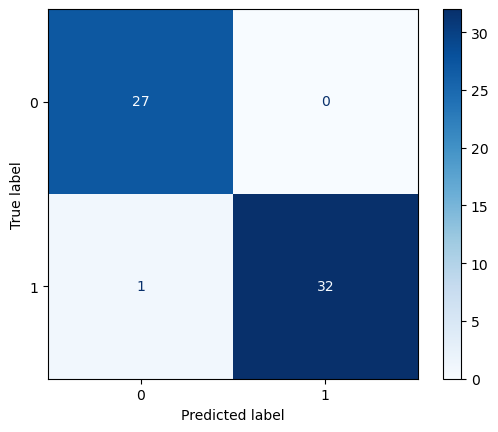

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

View decision boundary

80/80 [==============================] - 0s 393us/step


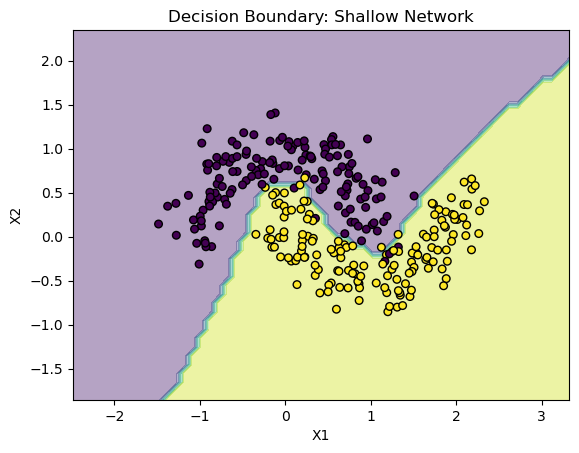

In [19]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots()

Z = (model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5).astype('int')
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(X[:, 0], X[:, 1], c = y, s=30, edgecolor="k")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Decision Boundary: Shallow Network')
plt.show()

The model object returns a history method:
- history attribute is a dictionary storing:
   - training/validation losses.
   - metrics on train/validation sets.

In [20]:
train_accuracy = history.history['loss']
validation_accuracy = history.history['val_loss']
train_history = pd.DataFrame(history.history)
train_history.index.name = 'epochs'
train_history.head()

,loss,accuracy,auc,val_loss,val_accuracy,val_auc
epochs,,,,,,
0,0.687923,0.520833,0.558907,0.692222,0.500000,0.691964
1,0.664680,0.656250,0.733555,0.671784,0.562500,0.842857
2,0.642554,0.708333,0.845969,0.652274,0.583333,0.950893
3,0.622964,0.755208,0.909349,0.633363,0.666667,0.972321
4,0.603178,0.802083,0.940929,0.615838,0.729167,0.970536


Plotting history:

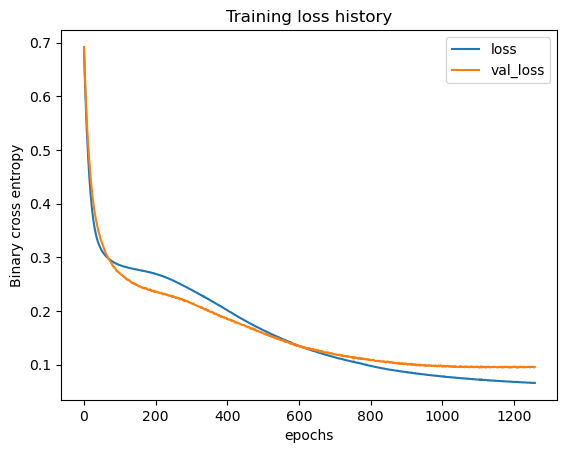

In [21]:
col_list = ['loss', 'val_loss']
train_history[col_list].plot()
plt.ylabel('Binary cross entropy')
plt.title('Training loss history')
plt.show()

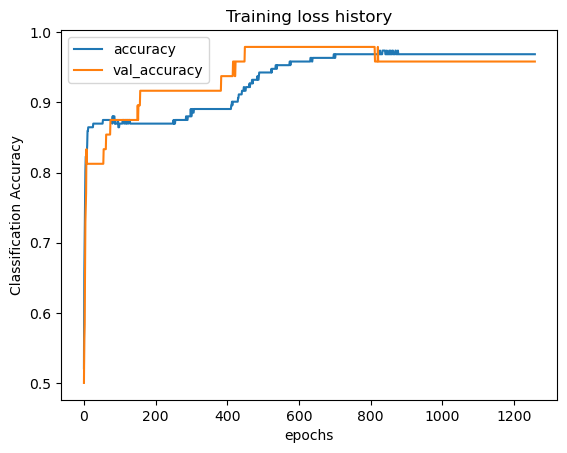

In [22]:
col_list = ['accuracy', 'val_accuracy']
train_history[col_list].plot()
plt.ylabel('Classification Accuracy')
plt.title('Training loss history')
plt.show()

#### Using neural networks to solve some harder problems

#### Image classificaton of hand-written digits

- The MNIST dataset: a classic benchmark for neural network image classification

In [23]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical # for target labels
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

In [24]:
# load in the data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

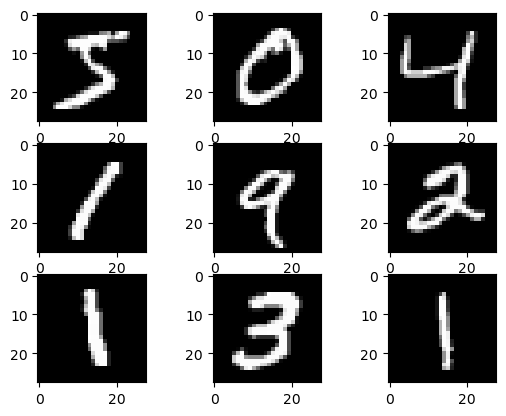

In [25]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
plt.show()

Good practice to normalize/standardize feature inputs:
- makes learning faster (optimization doesn't depend on variable scale)


<img src = "Images/normalize_nn.png" >

Another reason:
- keeping values small helps keeps weights stable

In [26]:
x_train = x_train/255 # normalization
x_test = x_test/255

# Keras requires multi-class labels to be one-hot encoded
y_tr_one_hot = to_categorical(y_train)
y_tt_one_hot = to_categorical(y_test)
y_tt_one_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Sequential model: add another hidden layer

- additional layer will help us learn more complex features
- note: we've added a few more units in first hidden layer as well.

In [27]:
model_images = Sequential()
model_images.add(Flatten(input_shape=(28, 28))) # flattens each 28x28 image into a vector
model_images.add(Dense(32, activation='relu'))
model_images.add(Dense(8, activation='relu'))
model_images.add(Dense(10, activation='softmax')) # number of units = number of target classes

In [28]:
model_images.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'] )

Let's train the model.

- Here we will use **validation** loss: stopping to prevent overfitting.

In [29]:
valcallback = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 2)

In [30]:
history_mnist = model_images.fit(x_train, y_tr_one_hot, epochs=100, batch_size= 32, validation_split = 0.2, 
                 callbacks = [trainCallback] )

Epoch 1/100
1500/1500 [==============================] - 2s 973us/step - loss: 0.5186 - accuracy: 0.8431 - val_loss: 0.2442 - val_accuracy: 0.9311
Epoch 2/100
1500/1500 [==============================] - 1s 849us/step - loss: 0.2229 - accuracy: 0.9354 - val_loss: 0.1911 - val_accuracy: 0.9449
Epoch 3/100
1500/1500 [==============================] - 1s 896us/step - loss: 0.1729 - accuracy: 0.9494 - val_loss: 0.1640 - val_accuracy: 0.9535
Epoch 4/100
1500/1500 [==============================] - 1s 847us/step - loss: 0.1455 - accuracy: 0.9574 - val_loss: 0.1514 - val_accuracy: 0.9555
Epoch 5/100
1500/1500 [==============================] - 1s 848us/step - loss: 0.1253 - accuracy: 0.9626 - val_loss: 0.1474 - val_accuracy: 0.9532
Epoch 6/100
1500/1500 [==============================] - 1s 844us/step - loss: 0.1104 - accuracy: 0.9671 - val_loss: 0.1429 - val_accuracy: 0.9587
Epoch 7/100
1500/1500 [==============================] - 1s 853us/step - loss: 0.0983 - accuracy: 0.9702 - val_loss: 0

1500/1500 [==============================] - 1s 834us/step - loss: 0.0109 - accuracy: 0.9961 - val_loss: 0.2788 - val_accuracy: 0.9612
Epoch 57/100
1500/1500 [==============================] - 1s 839us/step - loss: 0.0093 - accuracy: 0.9973 - val_loss: 0.2812 - val_accuracy: 0.9603
Epoch 58/100
1500/1500 [==============================] - 1s 839us/step - loss: 0.0112 - accuracy: 0.9964 - val_loss: 0.2913 - val_accuracy: 0.9594
Epoch 59/100
1500/1500 [==============================] - 1s 840us/step - loss: 0.0100 - accuracy: 0.9967 - val_loss: 0.2868 - val_accuracy: 0.9590
Epoch 60/100
1500/1500 [==============================] - 1s 849us/step - loss: 0.0117 - accuracy: 0.9963 - val_loss: 0.3238 - val_accuracy: 0.9574
Epoch 61/100
1500/1500 [==============================] - 1s 837us/step - loss: 0.0093 - accuracy: 0.9968 - val_loss: 0.3018 - val_accuracy: 0.9595
Epoch 62/100
1500/1500 [==============================] - 1s 833us/step - loss: 0.0084 - accuracy: 0.9975 - val_loss: 0.3197 

In [31]:
# probability for each class
y_proba = model_images.predict(x_test)
y_proba

313/313 [==============================] - 0s 444us/step


array([[3.3761588e-17, 1.1438723e-21, 1.0889260e-11, ..., 1.0000000e+00,
        2.2604058e-22, 1.9663833e-17],
       [2.8611241e-18, 9.1775386e-22, 1.0000000e+00, ..., 5.9695886e-38,
        7.5135024e-28, 0.0000000e+00],
       [9.9442122e-20, 1.0000000e+00, 2.6396782e-12, ..., 6.4120211e-09,
        1.6727969e-09, 9.8128276e-13],
       ...,
       [6.0927043e-35, 1.5678779e-21, 9.7583810e-36, ..., 3.1728962e-21,
        6.5674448e-17, 1.4360846e-13],
       [0.0000000e+00, 2.3994428e-30, 0.0000000e+00, ..., 0.0000000e+00,
        2.0681970e-22, 2.9389399e-37],
       [7.3188011e-14, 1.7282173e-19, 7.3562611e-23, ..., 5.4075180e-37,
        7.0264841e-18, 4.8055144e-28]], dtype=float32)

In [32]:
model_images.evaluate(x_test, y_tt_one_hot, verbose = 0)

[0.34466880559921265, 0.9599000215530396]

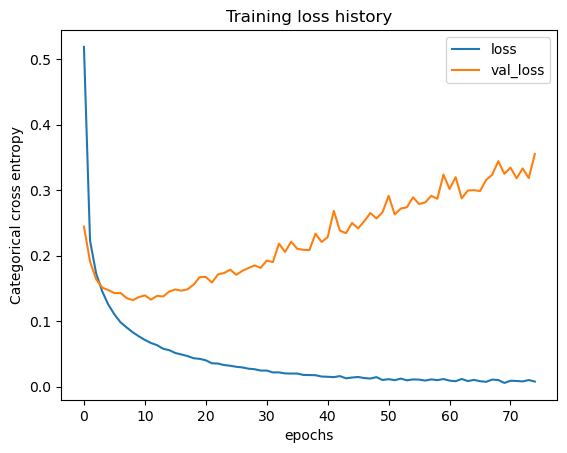

In [33]:
train_mnist_history = pd.DataFrame(history_mnist.history)
train_mnist_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_mnist_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

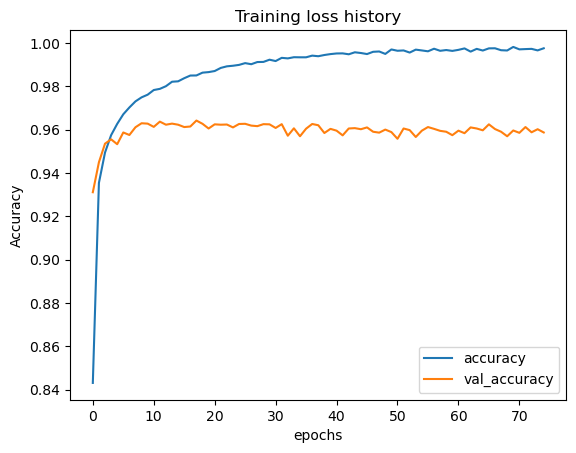

In [34]:
col_list = ['accuracy', 'val_accuracy']
train_mnist_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

Clearly, some overfitting.

Getting the class predictions from softmax probabilities.

In [35]:
# argmax axis = -1 gets the column index of maximum probability for each row.
# column index corresponds to digit classes (numbers 0 -9)
predicted = np.argmax(y_proba, axis=-1)
predicted

array([7, 2, 1, ..., 4, 5, 6])

Let's look at our classifier did on the test set in more detail.

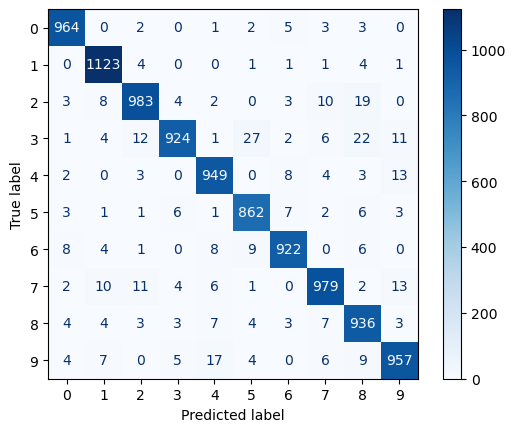

In [36]:
cm_digits = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_digits)

disp.plot(cmap=plt.cm.Blues)
plt.show()

Not bad:
- but in the context of many tasks this is not yet a viable system.
- e.g., reading checks, etc

- Next steps: increasing network complexity / train longer but not overfitting
- getting better fitting and test-set generalization

<center><b>Network Regularization</b></center>